In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
#Based off Mozilla the Common Voice Dataset

In [32]:
# Load the metadata
file_path = "../cv-corpus/en/validated.tsv"
df = pd.read_csv(file_path, sep='\t')

# Display the first few rows to get a sense of the data
df.head()


,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
0,01e8ea298cdecf26e273f5baac3915eb992c493f229686...,common_voice_en_39751075.mp3,e5e7d4694b7160add018a08876327f254690c1ab4c39ea...,Madin was a significant figure of post-war Bir...,NaN,2,0,NaN,NaN,"United States English,New York English",NaN,en,NaN
1,02cbc1fe01fc67fa72c6e067fbe020399082efbeb57a2b...,common_voice_en_39589864.mp3,e3e7c913ce32a3b5a58dda5fa1d855f2529ed36e1fa33f...,Alexandria and Texas were shut down mid-season.,NaN,2,0,NaN,NaN,NaN,NaN,en,NaN
2,03b62f72067ec967c423852bef03d1b61e63c156d86f6e...,common_voice_en_40087973.mp3,e90c361c9684d01d31bc6e8df3060bc97e536ca707bef4...,No runoff was necessary.,NaN,2,0,teens,transgender,Scottish English,NaN,en,NaN
3,05112cb5965431bbd47abd29b4faea9fb009b5a2e320e0...,common_voice_en_39587246.mp3,e3a1d0662e080f880a899b5a5226af16acf61360b1128e...,He was temporarily in charge of consular affai...,NaN,2,0,NaN,NaN,NaN,NaN,en,NaN
4,05d33ad00cc2754da8e542a33a5255f9346535ef1d8619...,common_voice_en_40117514.mp3,e9475052b6e625f8c5890389e4ffc17a1078dec1483592...,It was a sickening sight.,NaN,2,0,twenties,male_masculine,Australian English,NaN,en,NaN


In [33]:
# List all the columns in the dataset
df.columns

Index(['client_id', 'path', 'sentence_id', 'sentence', 'sentence_domain',
       'up_votes', 'down_votes', 'age', 'gender', 'accents', 'variant',
       'locale', 'segment'],
      dtype='object')

In [34]:
print("Number of samples", len(df))

Number of samples 1877


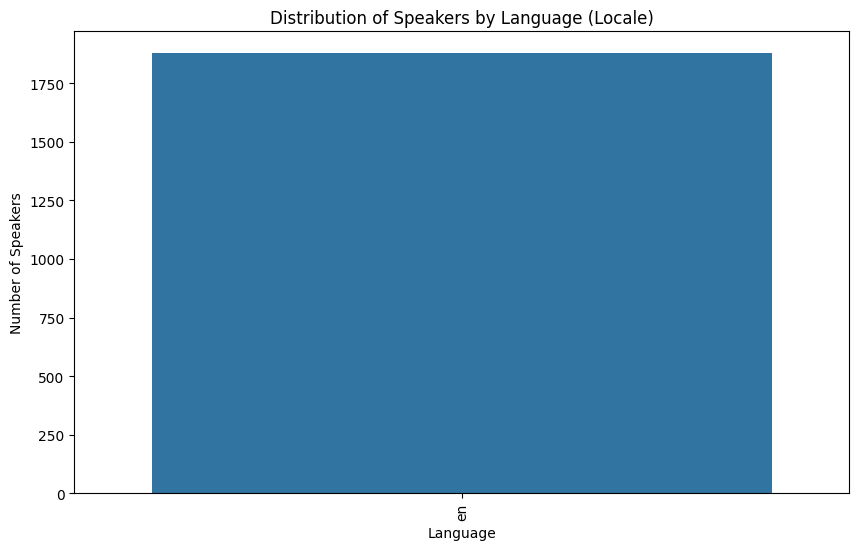

In [35]:
# Count the number of recordings per language (locale)
language_distribution = df['locale'].value_counts()

# Plot the distribution
plt.figure(figsize=(10,6))
sns.barplot(x=language_distribution.index, y=language_distribution.values)
plt.title("Distribution of Speakers by Language (Locale)")
plt.xlabel("Language")
plt.ylabel("Number of Speakers")
plt.xticks(rotation=90)
plt.show()


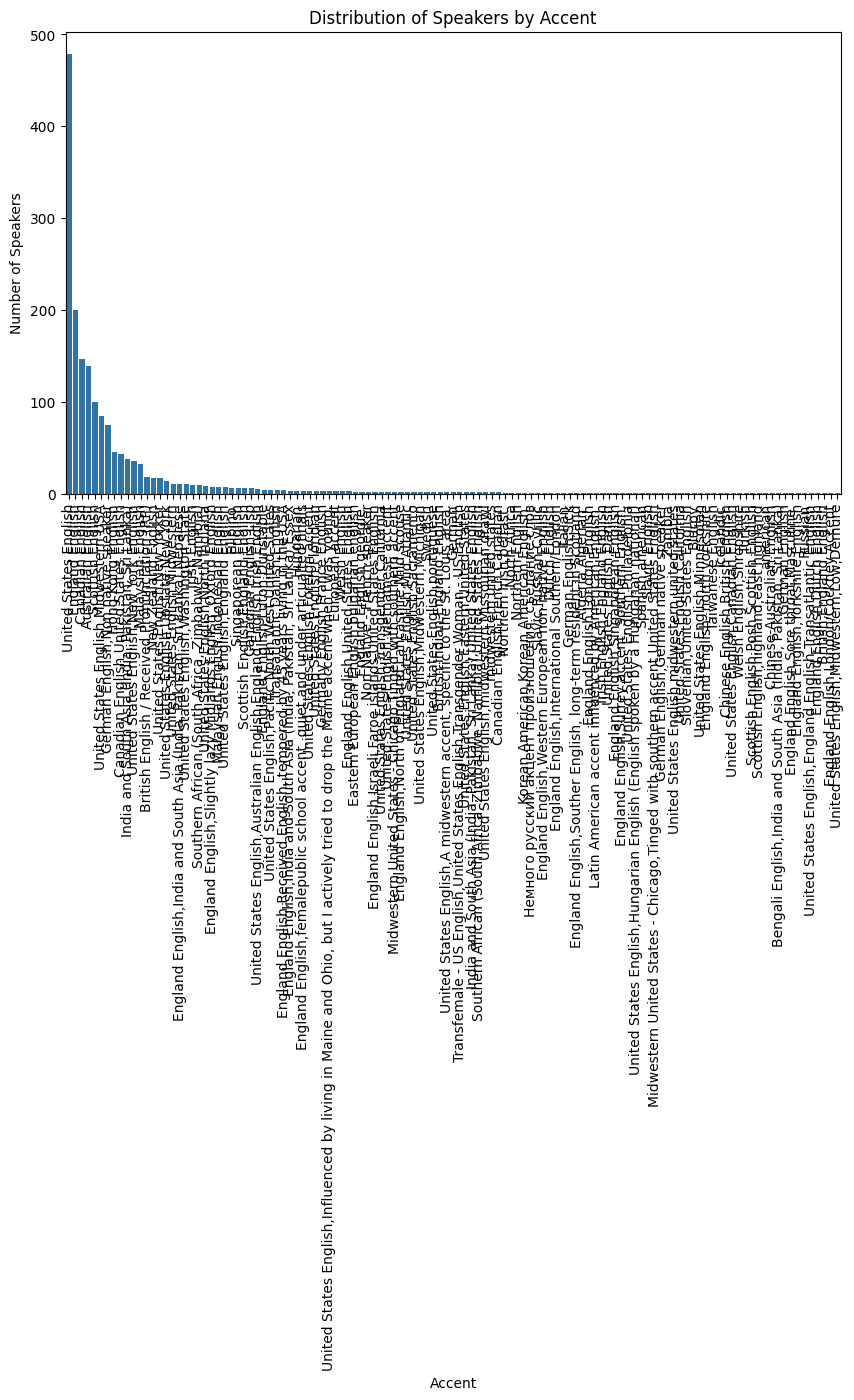

In [36]:
# Count the number of recordings per accent
accent_distribution = df['accents'].value_counts(dropna=False)

# Plot the distribution
plt.figure(figsize=(10,6))
sns.barplot(x=accent_distribution.index, y=accent_distribution.values)
plt.title("Distribution of Speakers by Accent")
plt.xlabel("Accent")
plt.ylabel("Number of Speakers")
plt.xticks(rotation=90)
plt.show()


/var/folders/_0/_26v5kpj3vgggdt6m2cbrbkm0000gp/T/ipykernel_87466/2211544080.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accent_distribution.values, y=accent_distribution.index, palette="viridis")


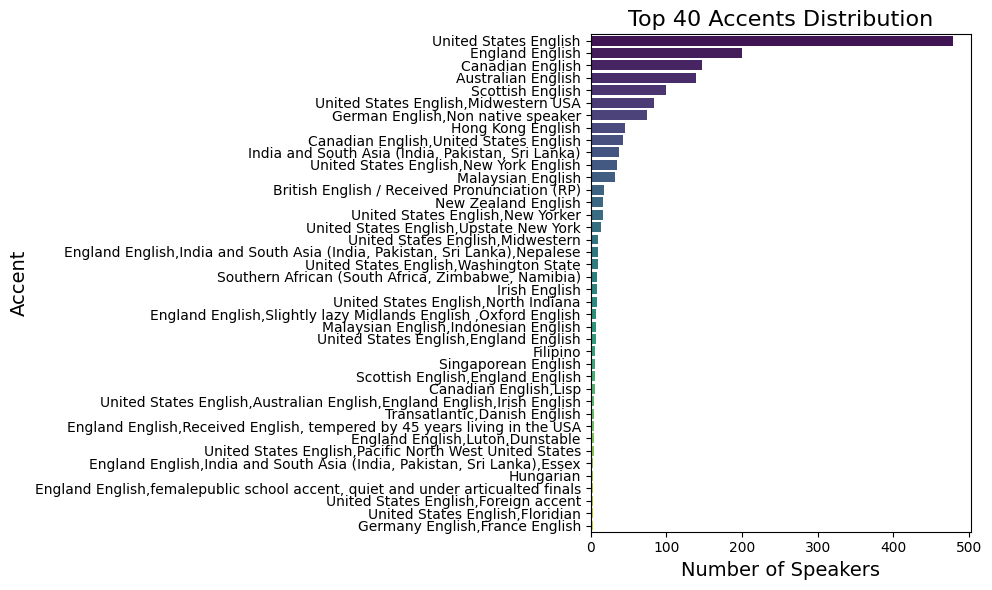

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data (replace this with loading your dataset)
# df = pd.read_csv("validated.tsv", sep='\t')
# For now, let's assume 'df' contains an 'accent' column

# Count the number of occurrences per accent
accent_distribution = df['accents'].value_counts()

# Optionally, limit to top N accents
top_n = 40  # Change this to display more or fewer accents
accent_distribution = accent_distribution.head(top_n)

# Sort the distribution by frequency for clearer plotting
accent_distribution = accent_distribution.sort_values(ascending=False)

# Plot as a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=accent_distribution.values, y=accent_distribution.index, palette="viridis")

plt.title(f"Top {top_n} Accents Distribution", fontsize=16)
plt.xlabel("Number of Speakers", fontsize=14)
plt.ylabel("Accent", fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


In [38]:
# Function to classify if the accent is foreign or non-native, excluding NaN values
def is_foreign_accent(accent):
    if pd.isna(accent):  # Check if the value is NaN
        return False
    accent = accent.lower()  # Convert to lowercase
    if "foreign" in accent or "non native" in accent or "english" not in accent:
        return True
    return False
# Apply the function to each row in the 'accent' column and add a new column, handling NaN values
df['is_foreign'] = df['accents'].apply(is_foreign_accent)

# Display the updated DataFrame
non_native_count = df['is_foreign'].sum()  # Sum up all the True values (non-native)
native_count = len(df) - non_native_count  # Subtract non-native from total to get native count

# Display the updated DataFrame and the counts
print(df)
print(f"Number of native accents: {native_count}")
print(f"Number of non-native accents: {non_native_count}")
print(df)


                                              client_id  \
0     01e8ea298cdecf26e273f5baac3915eb992c493f229686...   
1     02cbc1fe01fc67fa72c6e067fbe020399082efbeb57a2b...   
2     03b62f72067ec967c423852bef03d1b61e63c156d86f6e...   
3     05112cb5965431bbd47abd29b4faea9fb009b5a2e320e0...   
4     05d33ad00cc2754da8e542a33a5255f9346535ef1d8619...   
...                                                 ...   
1872  b87dd0680063cbd3dc57f5b9b20c14f020f511c3f18467...   
1873  b87dd0680063cbd3dc57f5b9b20c14f020f511c3f18467...   
1874  b87dd0680063cbd3dc57f5b9b20c14f020f511c3f18467...   
1875  b87dd0680063cbd3dc57f5b9b20c14f020f511c3f18467...   
1876  b87dd0680063cbd3dc57f5b9b20c14f020f511c3f18467...   

                              path  \
0     common_voice_en_39751075.mp3   
1     common_voice_en_39589864.mp3   
2     common_voice_en_40087973.mp3   
3     common_voice_en_39587246.mp3   
4     common_voice_en_40117514.mp3   
...                            ...   
1872  common_voice_en_400

In [39]:

# Display the updated DataFrame and the counts
print(df_orig.head(5))
print(f"Number of native accents: {native_count}")
print(f"Number of non-native accents: {non_native_count}")

                                           client_id  \
0  01e8ea298cdecf26e273f5baac3915eb992c493f229686...   
1  02cbc1fe01fc67fa72c6e067fbe020399082efbeb57a2b...   
2  03b62f72067ec967c423852bef03d1b61e63c156d86f6e...   
3  05112cb5965431bbd47abd29b4faea9fb009b5a2e320e0...   
4  05d33ad00cc2754da8e542a33a5255f9346535ef1d8619...   

                           path  \
0  common_voice_en_39751075.mp3   
1  common_voice_en_39589864.mp3   
2  common_voice_en_40087973.mp3   
3  common_voice_en_39587246.mp3   
4  common_voice_en_40117514.mp3   

                                         sentence_id  \
0  e5e7d4694b7160add018a08876327f254690c1ab4c39ea...   
1  e3e7c913ce32a3b5a58dda5fa1d855f2529ed36e1fa33f...   
2  e90c361c9684d01d31bc6e8df3060bc97e536ca707bef4...   
3  e3a1d0662e080f880a899b5a5226af16acf61360b1128e...   
4  e9475052b6e625f8c5890389e4ffc17a1078dec1483592...   

                                            sentence sentence_domain  \
0  Madin was a significant figure of post-w

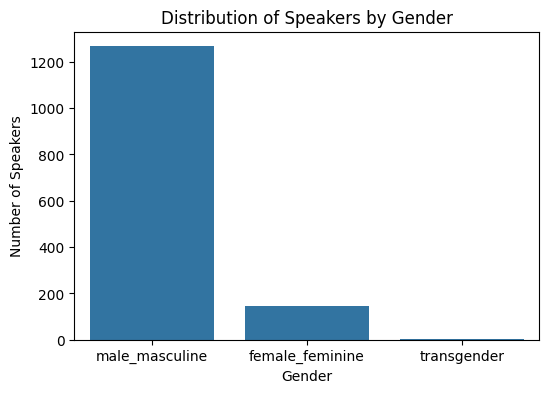

In [40]:
# Count the number of recordings per gender
gender_distribution = df['gender'].value_counts(dropna=False)

# Plot the distribution
plt.figure(figsize=(6,4))
sns.barplot(x=gender_distribution.index, y=gender_distribution.values)
plt.title("Distribution of Speakers by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Speakers")
plt.show()


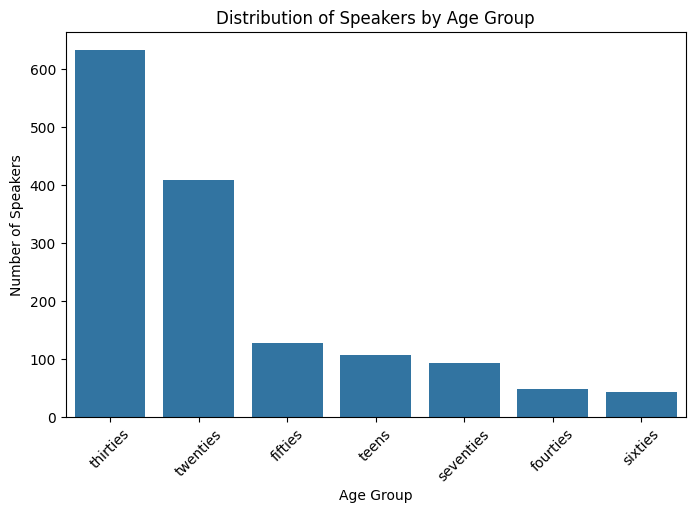

In [41]:
# Count the number of recordings per age group
age_distribution = df['age'].value_counts(dropna=False)

# Plot the distribution
plt.figure(figsize=(8,5))
sns.barplot(x=age_distribution.index, y=age_distribution.values)
plt.title("Distribution of Speakers by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Speakers")
plt.xticks(rotation=45)
plt.show()


In [3]:
from pydub import AudioSegment

def convert_mp3_to_wav(mp3_path, wav_path):
    sound = AudioSegment.from_mp3(mp3_path)
    sound.export(wav_path, format="wav")

In [8]:
import os

audio_file = "/Users/yuliapavlova/Documents/cv-corpus/en/clips/common_voice_en_39751075.mp3"

# Check if file exists
if os.path.exists(audio_file):
    print("File exists")
else:
    print("File does not exist")


File exists


In [42]:
import os
from pydub import AudioSegment
import speech_recognition as sr
import pandas as pd
import time

# Function to convert mp3 to wav
def convert_mp3_to_wav(mp3_path, wav_path):
    if not os.path.exists(mp3_path):
        print(f"File {mp3_path} does not exist!")
        return None
    try:
        sound = AudioSegment.from_mp3(mp3_path)
        sound.export(wav_path, format="wav")
        print(f"Converted {mp3_path} to {wav_path}")
        return wav_path
    except Exception as e:
        print(f"Error converting {mp3_path} to WAV: {e}")
        return None

# Function to transcribe audio using SpeechRecognition
def transcribe_audio(audio_file, retries=3, delay=5):
    recognizer = sr.Recognizer()
    # Check if the file is mp3 and convert to wav if necessary
    if audio_file.endswith(".mp3"):
        wav_file = audio_file.replace(".mp3", ".wav")
        #convert_mp3_to_wav(audio_file, wav_file)
        audio_file = wav_file  # Use the converted WAV file

    attempts = 0
    while attempts < retries:
        try:
            with sr.AudioFile(audio_file) as source:
                audio = recognizer.record(source)
                text = recognizer.recognize_google(audio)
                return text
        except sr.UnknownValueError:
            return ""  # Return empty string if transcription fails
        except sr.RequestError as e:
            print(f"Could not request results from Google Speech API; {e}")
            return ""
        except ConnectionResetError:
            attempts += 1
            print(f"ConnectionResetError: Retrying in {delay} seconds (Attempt {attempts}/{retries})")
            time.sleep(delay)

    return ""  # Return empty string if transcription fails after retries

import string

# Function to remove punctuation from a given text
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Function to normalize text (lowercase and remove punctuation)
def normalize_text(text):
    text_no_punct = remove_punctuation(text)
    return text_no_punct.lower()

# Modified function to calculate precision and recall, ignoring punctuation and case
def evaluate_transcription(predicted_text, actual_text):
    # Normalize both predicted and actual text (lowercase and remove punctuation)
    predicted_text_clean = normalize_text(predicted_text)
    actual_text_clean = normalize_text(actual_text)
    
    if not predicted_text_clean:  # If the transcription is empty, skip evaluation
        print("Skipping evaluation: transcription failed or is empty.")
        return None, None
    
    predicted_words = set(predicted_text_clean.split())
    actual_words = set(actual_text_clean.split())
    
    true_positives = len(predicted_words & actual_words)
    false_positives = len(predicted_words - actual_words)
    false_negatives = len(actual_words - predicted_words)
    
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    
    return precision, recall

In [61]:
# Load the dataset (assuming you have a DataFrame with 'path' and 'sentence' columns)
df_orig = df
df = df
# List to store the results
results = []

# Loop over the DataFrame rows
for index, row in df.iterrows():
    audio_file = row['path']  # Path to the audio file
    ground_truth_text = row['sentence']  # Ground truth transcription
    
    # Transcribe audio
    predicted_text = transcribe_audio("/Users/yuliapavlova/Documents/cv-corpus/en/clips/" +audio_file)  # Ensure each transcription is independent for each row
    
    # Ensure the transcribed text is properly reset for each file
    if not predicted_text:
        print(f"Transcription failed for file: {audio_file}")
    
    # Evaluate transcription only if transcription was successful
    precision, recall = 0, 0
    precision, recall = evaluate_transcription(predicted_text, ground_truth_text)
    
    # If precision and recall are None, skip appending this row to the results
    if precision is not None and recall is not None:
        # Append results to the list only if transcription and evaluation succeeded
        results.append({
            'path': audio_file,
            'ground_truth_text': ground_truth_text,
            'transcribed_text': predicted_text,  # This value should now be correct for each row
            'precision': precision,
            'recall': recall
        })

# Convert results to a DataFrame for easier inspection
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)

# Optionally, save to a CSV file
results_df.to_csv("transcription_results.csv", index=False)
df = df_orig

Transcription failed for file: common_voice_en_39598769.mp3
Skipping evaluation: transcription failed or is empty.
ConnectionResetError: Retrying in 5 seconds (Attempt 1/3)
ConnectionResetError: Retrying in 5 seconds (Attempt 1/3)
Could not request results from Google Speech API; recognition connection failed: [Errno 32] Broken pipe
Transcription failed for file: common_voice_en_39635573.mp3
Skipping evaluation: transcription failed or is empty.
ConnectionResetError: Retrying in 5 seconds (Attempt 1/3)
ConnectionResetError: Retrying in 5 seconds (Attempt 1/3)
ConnectionResetError: Retrying in 5 seconds (Attempt 1/3)
ConnectionResetError: Retrying in 5 seconds (Attempt 1/3)
Could not request results from Google Speech API; recognition connection failed: [Errno 32] Broken pipe
Transcription failed for file: common_voice_en_40015490.mp3
Skipping evaluation: transcription failed or is empty.
ConnectionResetError: Retrying in 5 seconds (Attempt 1/3)
ConnectionResetError: Retrying in 5 secon

In [62]:
import os
import Levenshtein
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import jaccard_score
from rouge_score import rouge_scorer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to calculate Levenshtein distance
def calculate_levenshtein(gt, pred):
    return Levenshtein.distance(gt, pred)

# Function to calculate Rouge-2
def calculate_rouge2(gt, pred):
    scorer = rouge_scorer.RougeScorer(['rouge2'], use_stemmer=True)
    scores = scorer.score(gt, pred)
    return scores['rouge2'].fmeasure

# Function to calculate Jaccard distance (for sets of words)
def calculate_jaccard(gt, pred):
    gt_words = set(gt.split())
    pred_words = set(pred.split())
    intersection = gt_words.intersection(pred_words)
    union = gt_words.union(pred_words)
    return 1 - len(intersection) / len(union)  # Jaccard distance = 1 - Jaccard similarity

# Function to calculate Cosine similarity with TF-IDF
def calculate_cosine_similarity(gt, pred):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([gt, pred])
    cosine_sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])
    return cosine_sim[0][0]

# Function to compute all similarity metrics
def compute_similarity_metrics(gt, pred):
    lev = calculate_levenshtein(gt, pred)
    rouge2 = calculate_rouge2(gt, pred)
    jaccard = calculate_jaccard(gt, pred)
    cosine_sim = calculate_cosine_similarity(gt, pred)
    return lev, rouge2, jaccard, cosine_sim


In [63]:
# Load the dataset (assuming you have a DataFrame with 'path', 'sentence', and 'transcribed_text')

df_new = results_df

df_merged = pd.merge(df_new, df, on='path', how='inner')

# Display the merged DataFrame
print(df_merged)
"""
df = pd.DataFrame({
    'path': ['/path/to/audio1.mp3', '/path/to/audio2.mp3'],  # Replace with actual paths
    'sentence': ['Actual transcription 1', 'Actual transcription 2'],  # Ground truth
    'transcribed_text': ['Predicted transcription 1', 'Predicted transcription 2']  # Predicted
})
"""


                              path  \
0     common_voice_en_39751075.mp3   
1     common_voice_en_39589864.mp3   
2     common_voice_en_40087973.mp3   
3     common_voice_en_39587246.mp3   
4     common_voice_en_40117514.mp3   
...                            ...   
1859  common_voice_en_40069050.mp3   
1860  common_voice_en_40069051.mp3   
1861  common_voice_en_40110408.mp3   
1862  common_voice_en_40110420.mp3   
1863  common_voice_en_40110434.mp3   

                                      ground_truth_text  \
0     Madin was a significant figure of post-war Bir...   
1       Alexandria and Texas were shut down mid-season.   
2                              No runoff was necessary.   
3     He was temporarily in charge of consular affai...   
4                             It was a sickening sight.   
...                                                 ...   
1859  It was hosted by Robin Milhausen and Michael Cho.   
1860           Fifteen matches were taped at the event.   
1861  A new 

"\ndf = pd.DataFrame({\n    'path': ['/path/to/audio1.mp3', '/path/to/audio2.mp3'],  # Replace with actual paths\n    'sentence': ['Actual transcription 1', 'Actual transcription 2'],  # Ground truth\n    'transcribed_text': ['Predicted transcription 1', 'Predicted transcription 2']  # Predicted\n})\n"

In [64]:
len(df_merged)

1864

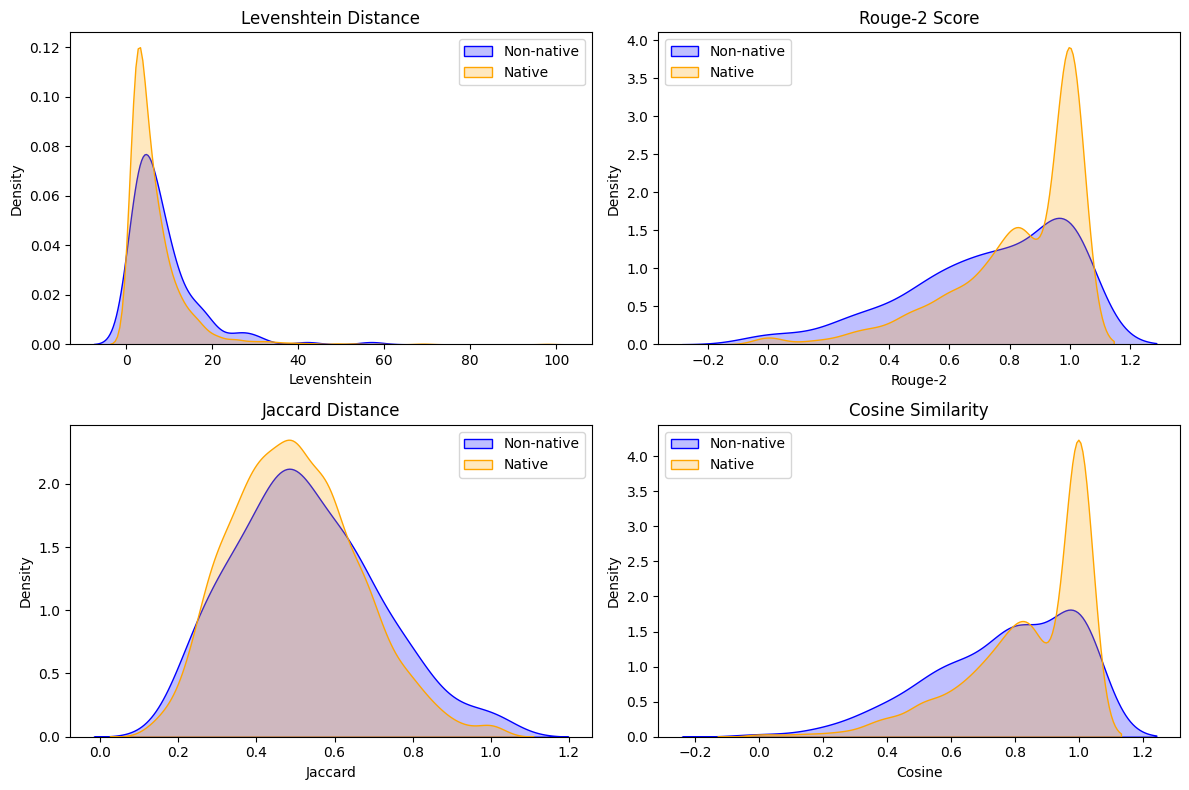

In [65]:

# Compute similarity metrics for each row
metrics = {'Levenshtein': [], 'Rouge-2': [], 'Jaccard': [], 'Cosine': []}
for index, row in df_merged.iterrows():
    gt = row['sentence']
    pred = row['transcribed_text']
    lev, rouge2, jaccard, cosine_sim = compute_similarity_metrics(gt, pred)
    
    # Append metrics
    metrics['Levenshtein'].append(lev)
    metrics['Rouge-2'].append(rouge2)
    metrics['Jaccard'].append(jaccard)
    metrics['Cosine'].append(cosine_sim)

# Add metrics to the DataFrame
df_merged['Levenshtein'] = metrics['Levenshtein']
df_merged['Rouge-2'] = metrics['Rouge-2']
df_merged['Jaccard'] = metrics['Jaccard']
df_merged['Cosine'] = metrics['Cosine']

# Display the DataFrame
#print(df_merged)

# Visualization with Kernel Density Estimation, separated by 'is_foreign'
plt.figure(figsize=(12, 8))

# Plot Levenshtein distance
plt.subplot(2, 2, 1)
sns.kdeplot(df_merged[df_merged['is_foreign'] == True]['Levenshtein'], fill=True, color='blue', label='Non-native')
sns.kdeplot(df_merged[df_merged['is_foreign'] == False]['Levenshtein'], fill=True, color='orange', label='Native')
plt.title('Levenshtein Distance')
plt.legend()

# Plot Rouge-2 score
plt.subplot(2, 2, 2)
sns.kdeplot(df_merged[df_merged['is_foreign'] == True]['Rouge-2'], fill=True, color='blue', label='Non-native')
sns.kdeplot(df_merged[df_merged['is_foreign'] == False]['Rouge-2'], fill=True, color='orange', label='Native')
plt.title('Rouge-2 Score')
plt.legend()

# Plot Jaccard distance
plt.subplot(2, 2, 3)
sns.kdeplot(df_merged[df_merged['is_foreign'] == True]['Jaccard'], fill=True, color='blue', label='Non-native')
sns.kdeplot(df_merged[df_merged['is_foreign'] == False]['Jaccard'], fill=True, color='orange', label='Native')
plt.title('Jaccard Distance')
plt.legend()

# Plot Cosine similarity
plt.subplot(2, 2, 4)
sns.kdeplot(df_merged[df_merged['is_foreign'] == True]['Cosine'], fill=True, color='blue', label='Non-native')
sns.kdeplot(df_merged[df_merged['is_foreign'] == False]['Cosine'], fill=True, color='orange', label='Native')
plt.title('Cosine Similarity')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

In [57]:
len(df_merged['is_foreign'] == True)

5

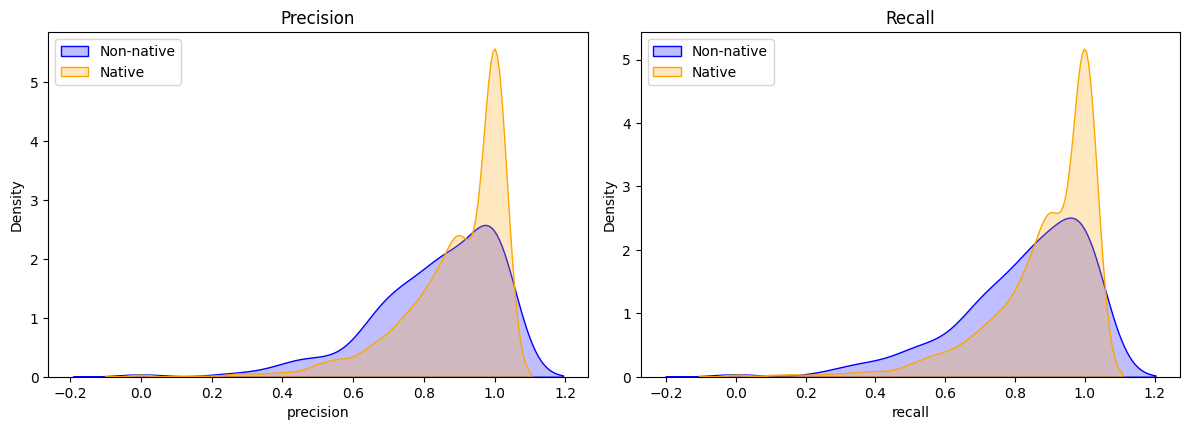

In [71]:
plt.figure(figsize=(12, 8))

# Plot Levenshtein distance
plt.subplot(2, 2, 1)
sns.kdeplot(df_merged[df_merged['is_foreign'] == True]['precision'], fill=True, color='blue', label='Non-native')
sns.kdeplot(df_merged[df_merged['is_foreign'] == False]['precision'], fill=True, color='orange', label='Native')
plt.title('Precision')
plt.legend()

plt.subplot(2, 2, 2)
sns.kdeplot(df_merged[df_merged['is_foreign'] == True]['recall'], fill=True, color='blue', label='Non-native')
sns.kdeplot(df_merged[df_merged['is_foreign'] == False]['recall'], fill=True, color='orange', label='Native')
plt.title('Recall')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

/var/folders/_0/_26v5kpj3vgggdt6m2cbrbkm0000gp/T/ipykernel_87466/2347784873.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='precision', y='accents', data=top_20_accents, palette='Blues_d')


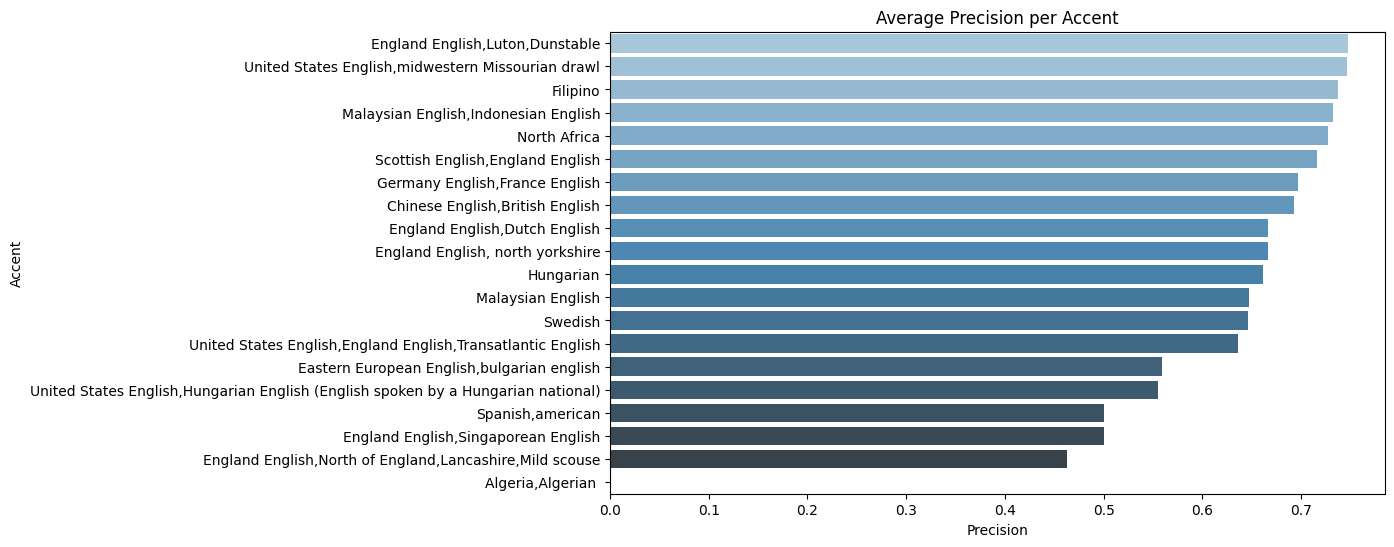

In [76]:
# Calculate the mean precision per accent
precision_per_accent = df_merged.groupby('accents')['precision'].mean().reset_index()
top_20_accents = precision_per_accent.sort_values(by='precision', ascending=False).tail(20)

# Plot the bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='precision', y='accents', data=top_20_accents, palette='Blues_d')

# Add labels and title
plt.xlabel('Precision')
plt.ylabel('Accent')
plt.title('Average Precision per Accent')

# Display the plot
plt.show()

/var/folders/_0/_26v5kpj3vgggdt6m2cbrbkm0000gp/T/ipykernel_87466/854328434.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='precision', y='accents', data=top_20_native, palette='Oranges_d')


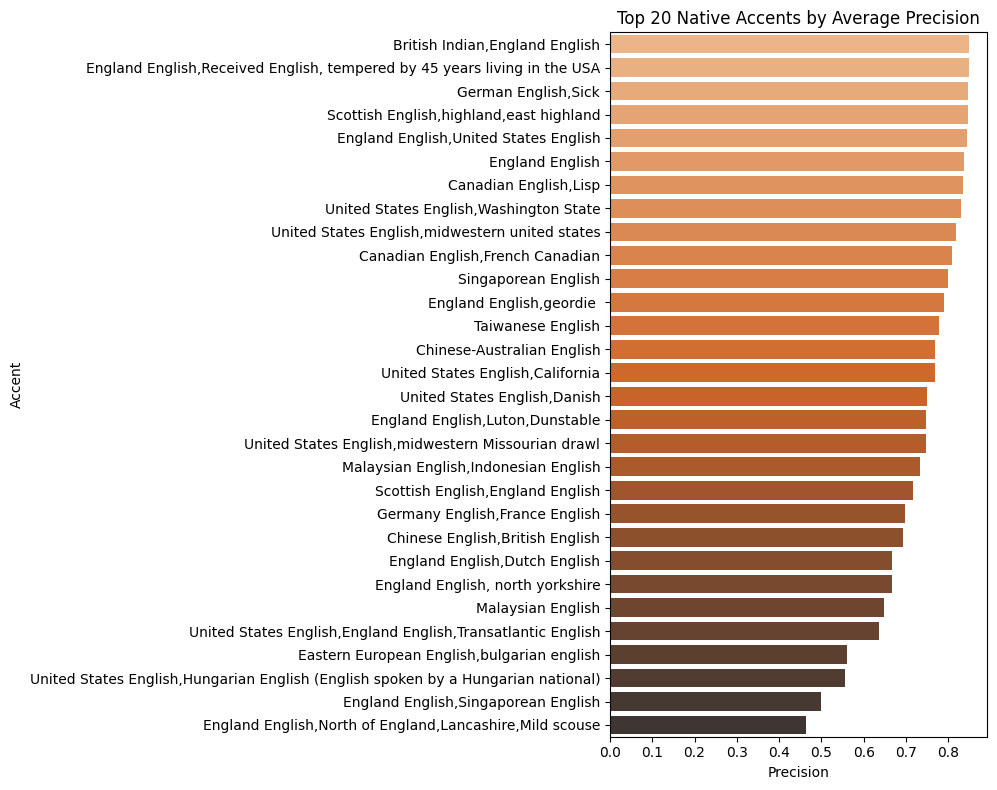

In [88]:
# Calculate the mean precision per accent, grouped by 'is_foreign'
precision_per_accent = df_merged.groupby(['accents', 'is_foreign'])['precision'].mean().reset_index()

# Sort accents by precision in descending order and select the top 20 accents for each group (is_foreign == True and False)
top_20_native = precision_per_accent[precision_per_accent['is_foreign'] == False].sort_values(by='precision', ascending=False).tail(30)
top_20_non_native = precision_per_accent[precision_per_accent['is_foreign'] == True].sort_values(by='precision', ascending=False)

#print(top_20_non_native)
# Plot the bar chart for both groups using seaborn
plt.figure(figsize=(14, 8))

# Plot for native accents (is_foreign == False)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot 1
sns.barplot(x='precision', y='accents', data=top_20_native, palette='Oranges_d')
plt.title('Top 20 Native Accents by Average Precision')
plt.xlabel('Precision')
plt.ylabel('Accent')


# Display the plots
plt.tight_layout()
plt.show()

/var/folders/_0/_26v5kpj3vgggdt6m2cbrbkm0000gp/T/ipykernel_87466/582161703.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='precision', y='accents', data=top_20_non_native, palette='Blues_d')


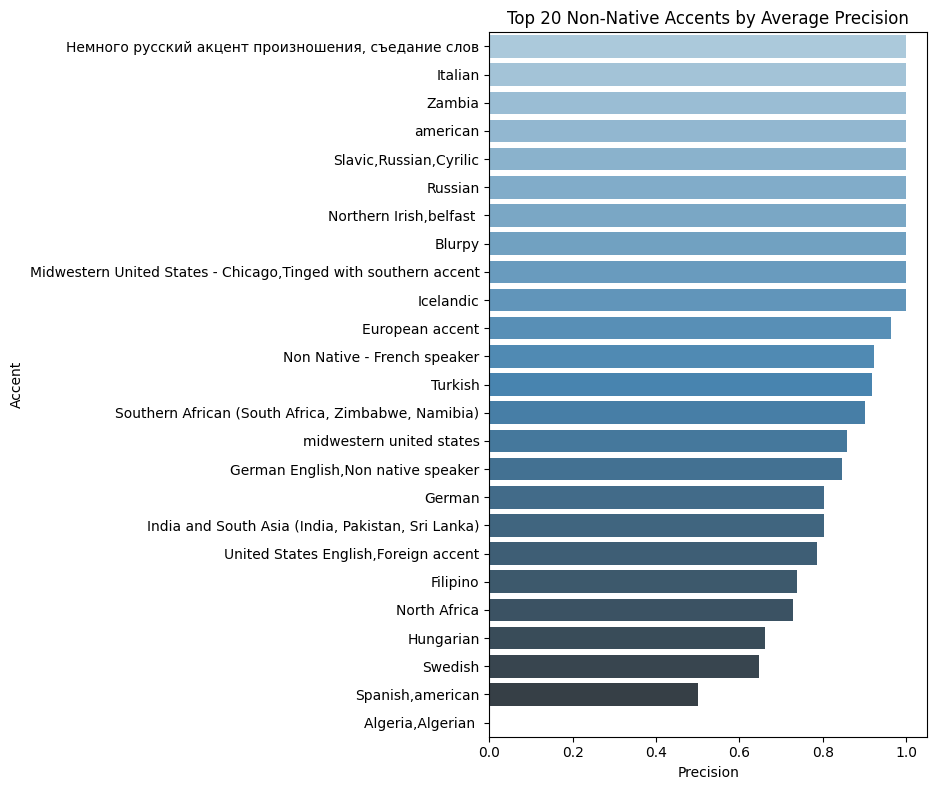

In [87]:
# Plot for native accents (is_foreign == False)
plt.figure(figsize=(14, 8))

# Plot for non-native accents (is_foreign == True)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot 2
sns.barplot(x='precision', y='accents', data=top_20_non_native, palette='Blues_d')
plt.title('Top 20 Non-Native Accents by Average Precision')
plt.xlabel('Precision')
plt.ylabel('Accent')

# Display the plots
plt.tight_layout()
plt.show()

/var/folders/_0/_26v5kpj3vgggdt6m2cbrbkm0000gp/T/ipykernel_87466/3366045170.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='native_status', y='precision', data=precision_by_foreign, palette='Blues_d')


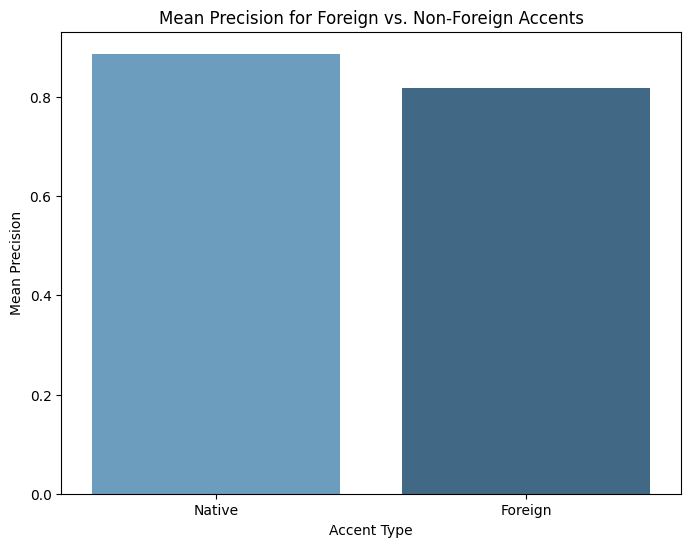

In [110]:

# Calculate the mean precision for foreign and non-foreign accents
precision_by_foreign = df_merged.groupby('native_status')['precision'].mean().reset_index()

# Map the is_foreign values to more readable labels
precision_by_foreign['native_status'] = precision_by_foreign['native_status'].map({"Native": 'Native', "Non-Native": 'Foreign'})

# Plot the bar chart using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='native_status', y='precision', data=precision_by_foreign, palette='Blues_d')

# Add labels and title
plt.xlabel('Accent Type')
plt.ylabel('Mean Precision')
plt.title('Mean Precision for Foreign vs. Non-Foreign Accents')

# Display the plot
plt.show()

In [89]:
unique_accents = df_merged['accents'].unique()
print(unique_accents)

['United States English,New York English' nan 'Scottish English'
 'Australian English' 'United States English' 'Northern English'
 'United States English,Transgender,California'
 'India and South Asia (India, Pakistan, Sri Lanka)'
 'Scottish English,Posh Scottish English'
 'United States English,England English,Transatlantic English'
 'German English,German native speaker' 'Canadian English'
 'Northern Irish,belfast ' 'Icelandic' 'Canadian English,Lisp'
 'United States English,midwestern united states' 'Zambia'
 'England English'
 'Midwestern United States - Chicago,Tinged with southern accent,United States English'
 'Slavic English' 'Spanish,american'
 'United States English,England English'
 'United States English,Hungarian English (English spoken by a Hungarian national)'
 'United States English,Philadelphia'
 'England English,Surrey accent, Southern English.'
 'United States English,Danish'
 'England English,Western European non-native English'
 'Irish English,England English'
 'La

In [98]:
import pandas as pd
import re

# List of unique accents
accents = [
    'United States English,New York English', 'nan', 'Scottish English', 'Australian English',
    'United States English', 'Northern English', 'United States English,Transgender,California',
    'India and South Asia (India, Pakistan, Sri Lanka)', 'Scottish English,Posh Scottish English',
    'United States English,England English,Transatlantic English', 'German English,German native speaker',
    'Canadian English', 'Northern Irish,belfast', 'Icelandic', 'Canadian English,Lisp',
    'United States English,midwestern united states', 'Zambia', 'England English',
    'Midwestern United States - Chicago,Tinged with southern accent,United States English',
    'Slavic English', 'Spanish,american', 'United States English,England English',
    'United States English,Hungarian English (English spoken by a Hungarian national)',
    'United States English,Philadelphia', 'England English,Surrey accent, Southern English.',
    'United States English,Danish', 'England English,Western European non-native English',
    'Irish English,England English', 'Latin American accent influenced by American English',
    'England English,London English', 'New Zealand English', 'Algeria,Algerian',
    'England English,Souther English, long-term resident in Scotland', 'German English,Sick', 'Italian',
    'England English,International Southern/London', 'Dutch English', 'United States English,California',
    'Southern African (South Africa, Zimbabwe, Namibia)', 'Irish English', 'England English,Singaporean English',
    'England English,Luton,Dunstable', 'Slovenian,United States English', 'Chinese-Australian English',
    'England English,London/Cockney Accent', 'British,England English', 'England English,Dutch English', 'Hungarian',
    'Hong Kong English', 'Russian', 'England English,Yorkshire English', 'United States English,Midwestern',
    'England English,Sore throat,Masculine', 'German', 'German English',
    'Bengali English,India and South Asia (India, Pakistan, Sri Lanka)', 'United States English,portuguese', 'american',
    'United States English,Minnesotan', 'Scottish English,highland,east highland', 'United States English,Midwestern,Low,Demure',
    'Turkish', 'Welsh English,Shropshire', 'United States English,Canadian English',
    'England English,India and South Asia (India, Pakistan, Sri Lanka),Essex', 'Chinese English,British English',
    'Немного русский акцент произношения, съедание слов', 'Taiwanese English', 'England English, north yorkshire', 'Blurpy',
    'Scottish English,England English', 'Slavic,Russian,Cyrilic', 'North Africa', 'Korean American,Korean American English',
    'United States English,A midwestern accent, specific to the St. Louis area.', 'Eastern European English,bulgarian english',
    'Canadian English,French Canadian', 'Non Native - French speaker', 'England English,Israeli,Faroe islands,United States English',
    'United States English,vietnamese accent', 'Midwestern United States - Chicago,Tinged with southern accent',
    'England English,North of England,Lancashire,Mild scouse', 'United States English,Mid Atlantic',
    'United States English,Sacramento', 'United States English,Midwestern,Michigan', 'England English,geordie',
    'British Indian,England English', 'Swedish', 'Transfemale - US English,United States English,Transgender Woman - US English',
    'United States English,Eastern United States', 'India and South Asia (India, Pakistan, Sri Lanka),United States English',
    'Southern African (South Africa, Zimbabwe, Namibia),United States English', 'United States English,midwestern Missourian drawl',
    'midwestern united states', 'England English,femalepublic school accent, quiet and under articualted finals',
    'United States English,Foreign accent', 'United States English,Floridian', 'Germany English,France English',
    'United States English,Influenced by living in Maine and Ohio, but I actively tried to drop the Maine accent when I was young.',
    'European accent', 'Welsh English', 'England English,United States English', 'England English,Received English, tempered by 45 years living in the USA',
    'Transatlantic,Danish English', 'United States English,Pacific North West United States',
    'United States English,Australian English,England English,Irish English', 'Singaporean English', 'Filipino',
    'Malaysian English,Indonesian English', 'England English,Slightly lazy Midlands English ,Oxford English',
    'United States English,North Indiana', 'United States English,Washington State',
    'England English,India and South Asia (India, Pakistan, Sri Lanka),Nepalese', 'United States English,Upstate New York',
    'United States English,New Yorker', 'British English / Received Pronunciation (RP)', 'Malaysian English',
    'Canadian English,United States English', 'German English,Non native speaker',
    'United States English,Midwestern USA'
]

# Define a mapping of keywords to countries and ethnicities
country_ethnicity_map = {
    'United States': 'USA',
    'American': 'USA',
    'Canadian': 'Canada',
    'Australian': 'Australia',
    'British': 'UK',
    'England': 'UK',
    'Scottish': 'UK',
    'Irish': 'Ireland',
    'German': 'Germany',
    'French': 'France',
    'Dutch': 'Netherlands',
    'Spanish': 'Spain',
    'Italian': 'Italy',
    'Indian': 'India',
    'Pakistani': 'Pakistan',
    'Sri Lankan': 'Sri Lanka',
    'Chinese': 'China',
    'Korean': 'Korea',
    'Russian': 'Russia',
    'Turkish': 'Turkey',
    'Malaysian': 'Malaysia',
    'Filipino': 'Philippines',
    'Zimbabwe': 'Zimbabwe',
    'South Africa': 'South Africa',
    'Namibian': 'Namibia',
    'Slavic': 'Slavic',
    'Eastern European': 'Eastern Europe',
    'Hungarian': 'Hungary',
    'Algerian': 'Algeria',
    'Zambia': 'Zambia',
    'Singaporean': 'Singapore',
    'Taiwanese': 'Taiwan',
    'Vietnamese': 'Vietnam',
    'Swedish': 'Sweden',
    'Icelandic': 'Iceland',
    'Bulgarian': 'Bulgaria',
    'Israeli': 'Israel'
}

# Function to categorize an accent based on the mapping
# Function to categorize an accent based on the mapping
def categorize_accent(accent, mapping):
    if pd.isna(accent):  # Skip NaN or missing values
        return 'Unknown'
    found_categories = set()
    for key, value in mapping.items():
        if re.search(key, accent, re.IGNORECASE):
            found_categories.add(value)
    if not found_categories:
        return 'Unknown'
    return ', '.join(found_categories)


# Create a DataFrame with categorized accents
#df_accents = pd.DataFrame({'accent': accents})

# Ensure that all NaN or 'nan' values are treated correctly
df_merged['accents'] = df_merged['accents'].replace('nan', pd.NA)  # Replace 'nan' string with actual NaN
df_merged['accents'] = df_merged['accents'].fillna(pd.NA)  # Ensure missing values are NaN

# Apply the function to categorize accents by countries/ethnicities
df_merged['country_ethnicity'] = df_merged['accents'].apply(lambda x: categorize_accent(x, country_ethnicity_map))

# Display the DataFrame with categorized accents
print(df_merged[['accents', 'country_ethnicity']])


                                     accents country_ethnicity
0     United States English,New York English               USA
1                                       <NA>           Unknown
2                           Scottish English                UK
3                                       <NA>           Unknown
4                         Australian English         Australia
...                                      ...               ...
1859                        Canadian English            Canada
1860                        Canadian English            Canada
1861                        Canadian English            Canada
1862                        Canadian English            Canada
1863                        Canadian English            Canada

[1864 rows x 2 columns]


/var/folders/_0/_26v5kpj3vgggdt6m2cbrbkm0000gp/T/ipykernel_87466/2704664035.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='precision', y='country_ethnicity', data=top_20_native, palette='Oranges_d')


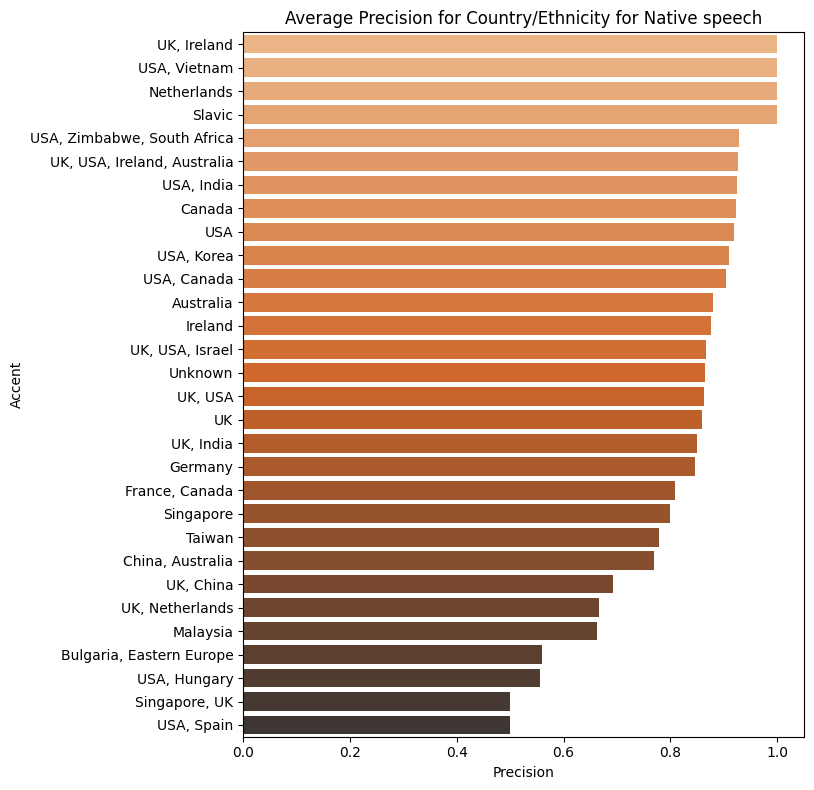

In [107]:
# Calculate the mean precision per accent, grouped by 'is_foreign'
precision_per_accent = df_merged.groupby(['country_ethnicity', 'native_status'])['precision'].mean().reset_index()

# Sort accents by precision in descending order and select the top 20 accents for each group (is_foreign == True and False)
top_20_native = precision_per_accent[precision_per_accent['native_status'] == "Native"].sort_values(by='precision', ascending=False)
top_20_non_native = precision_per_accent[precision_per_accent['native_status'] == "Non-Native"].sort_values(by='precision', ascending=False)

#print(top_20_non_native)
# Plot the bar chart for both groups using seaborn
plt.figure(figsize=(14, 8))

# Plot for native accents (is_foreign == False)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot 1
sns.barplot(x='precision', y='country_ethnicity', data=top_20_native, palette='Oranges_d')
plt.title('Average Precision for Country/Ethnicity for Native speech')
plt.xlabel('Precision')
plt.ylabel('Accent')


# Display the plots
plt.tight_layout()
plt.show()

/var/folders/_0/_26v5kpj3vgggdt6m2cbrbkm0000gp/T/ipykernel_87466/1154037627.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='precision', y='country_ethnicity', data=top_20_non_native, palette='Oranges_d')


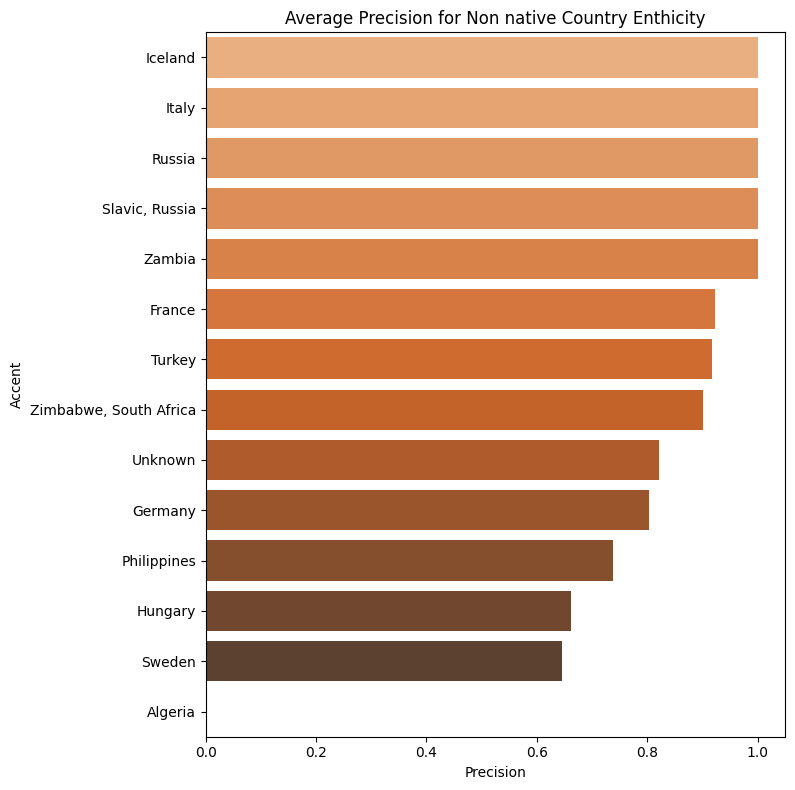

In [108]:

#print(top_20_non_native)
# Plot the bar chart for both groups using seaborn
plt.figure(figsize=(14, 8))

# Plot for native accents (is_foreign == False)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot 1
sns.barplot(x='precision', y='country_ethnicity', data=top_20_non_native, palette='Oranges_d')
plt.title('Average Precision for Non native Country Enthicity')
plt.xlabel('Precision')
plt.ylabel('Accent')


# Display the plots
plt.tight_layout()
plt.show()

In [103]:
import pandas as pd
import numpy as np

# List of accents (replace this with your actual data)
accents = [
    'United States English,New York English', 'nan', 'Scottish English',
    'Australian English', 'United States English', None, 'Slavic English', 'Irish English',
    'German English', 'Canadian English', 'Indian English', 'Chinese English', 'Spanish English'
]

# Define a set of keywords that identify native English accents
native_accents = [
    'United States', 'American', 'British', 'English', 'Australian', 'Scottish', 'Irish', 'Canadian', 'New Zealand'
]

# Function to classify accents as Native or Non-Native
def classify_accent(accent, native_list):
    if pd.isna(accent) or accent == 'nan':  # Handle NaN or missing values
        return 'Unknown'
    
    # Check if any of the native keywords are present in the accent description
    for native in native_list:
        if native.lower() in accent.lower():
            return 'Native'
    return 'Non-Native'

# Create a DataFrame with the accents
#df = pd.DataFrame({'accents': accents})

# Replace 'nan' strings with actual NaN values
df_merged['accents'] = df_merged['accents'].replace('nan', np.nan)

# Classify each accent as Native or Non-Native and add a new column
df_merged['native_status'] = df_merged['accents'].apply(lambda x: classify_accent(x, native_accents))

# Display the DataFrame with the new 'native_status' column
print(df_merged)


                              path  \
0     common_voice_en_39751075.mp3   
1     common_voice_en_39589864.mp3   
2     common_voice_en_40087973.mp3   
3     common_voice_en_39587246.mp3   
4     common_voice_en_40117514.mp3   
...                            ...   
1859  common_voice_en_40069050.mp3   
1860  common_voice_en_40069051.mp3   
1861  common_voice_en_40110408.mp3   
1862  common_voice_en_40110420.mp3   
1863  common_voice_en_40110434.mp3   

                                      ground_truth_text  \
0     Madin was a significant figure of post-war Bir...   
1       Alexandria and Texas were shut down mid-season.   
2                              No runoff was necessary.   
3     He was temporarily in charge of consular affai...   
4                             It was a sickening sight.   
...                                                 ...   
1859  It was hosted by Robin Milhausen and Michael Cho.   
1860           Fifteen matches were taped at the event.   
1861  A new 

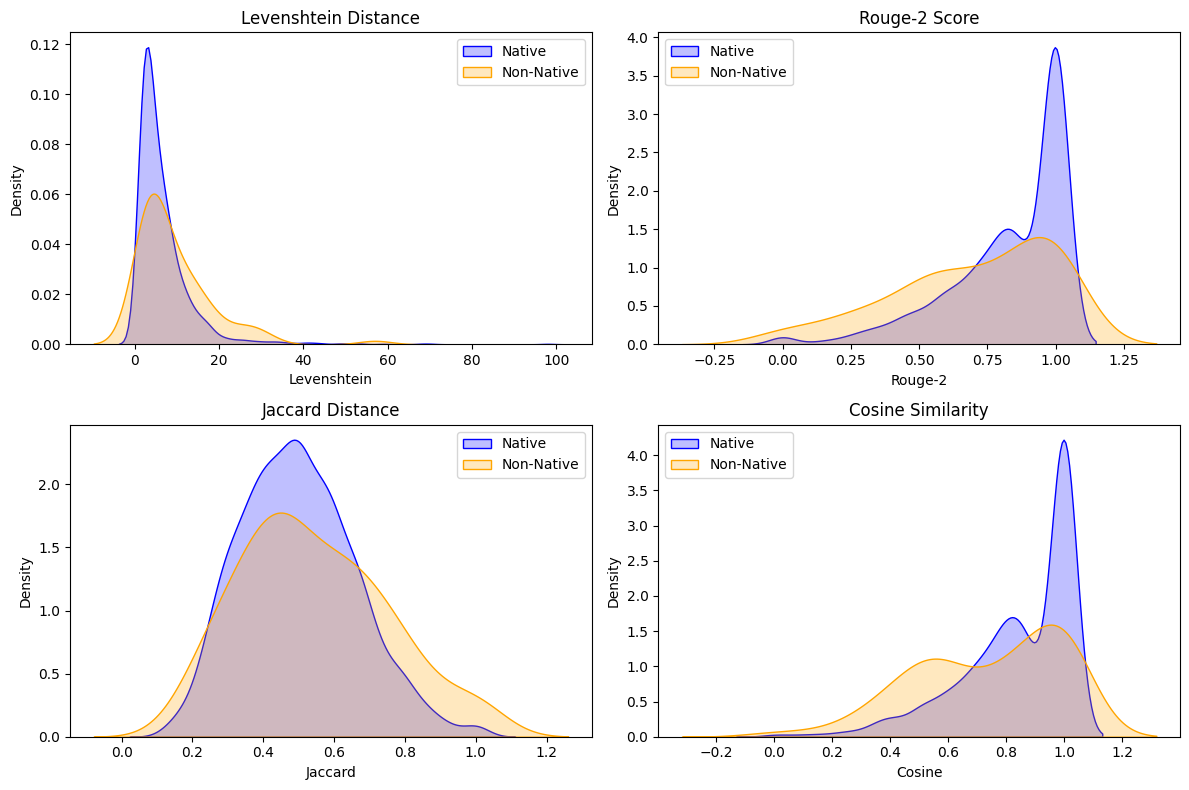

In [105]:

# Visualization with Kernel Density Estimation, separated by 'is_foreign'
plt.figure(figsize=(12, 8))

# Plot Levenshtein distance
plt.subplot(2, 2, 1)
sns.kdeplot(df_merged[df_merged['native_status'] == "Native"]['Levenshtein'], fill=True, color='blue', label='Native')
sns.kdeplot(df_merged[df_merged['native_status'] == "Non-Native"]['Levenshtein'], fill=True, color='orange', label='Non-Native')
plt.title('Levenshtein Distance')
plt.legend()

# Plot Rouge-2 score
plt.subplot(2, 2, 2)
sns.kdeplot(df_merged[df_merged['native_status'] == "Native"]['Rouge-2'], fill=True, color='blue', label='Native')
sns.kdeplot(df_merged[df_merged['native_status'] == "Non-Native"]['Rouge-2'], fill=True, color='orange', label='Non-Native')
plt.title('Rouge-2 Score')
plt.legend()

# Plot Jaccard distance
plt.subplot(2, 2, 3)
sns.kdeplot(df_merged[df_merged['native_status'] == "Native"]['Jaccard'], fill=True, color='blue', label='Native')
sns.kdeplot(df_merged[df_merged['native_status'] == "Non-Native"]['Jaccard'], fill=True, color='orange', label='Non-Native')
plt.title('Jaccard Distance')
plt.legend()

# Plot Cosine similarity
plt.subplot(2, 2, 4)
sns.kdeplot(df_merged[df_merged['native_status'] == "Native"]['Cosine'], fill=True, color='blue', label='Native')
sns.kdeplot(df_merged[df_merged['native_status'] == "Non-Native"]['Cosine'], fill=True, color='orange', label='Non-Native')
plt.title('Cosine Similarity')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

/var/folders/_0/_26v5kpj3vgggdt6m2cbrbkm0000gp/T/ipykernel_87466/1642369482.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accent_distribution.values, y=accent_distribution.index, palette="viridis")


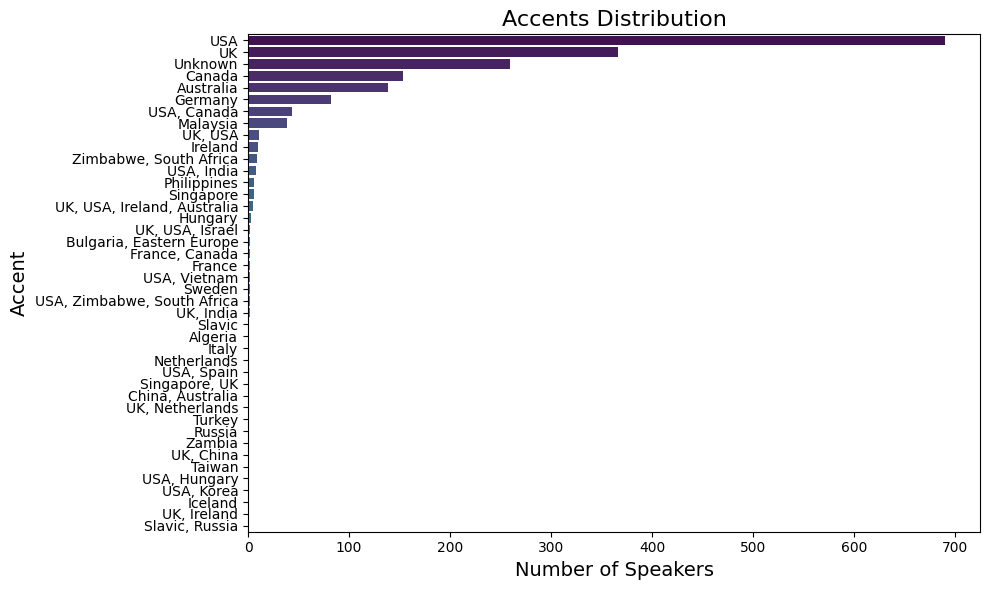

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data (replace this with loading your dataset)
# df = pd.read_csv("validated.tsv", sep='\t')
# For now, let's assume 'df' contains an 'accent' column

# Count the number of occurrences per accent
accent_distribution = df_merged['country_ethnicity'].value_counts()

# Optionally, limit to top N accents
top_n = 100  # Change this to display more or fewer accents
accent_distribution = accent_distribution#.head(top_n)

# Sort the distribution by frequency for clearer plotting
accent_distribution = accent_distribution.sort_values(ascending=False)

# Plot as a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=accent_distribution.values, y=accent_distribution.index, palette="viridis")

plt.title(f"Accents Distribution", fontsize=16)
plt.xlabel("Number of Speakers", fontsize=14)
plt.ylabel("Accent", fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()
